*** 
# Final Project Milestone #5: Analysis Pt. 2
### Felicia Faith Hangge 
### 13 May 2025 

#### Analyzing Citi Bike usage trends in New York City to assist Citi Bike and their parent company Lyft make smarter bussiness decisions by providing insights on when, where, and how people use their bikes. 

##### Data Source: https://citibikenyc.com/system-data (202410-citibike-tripdata_1.csv)
***

## 1.) Importing Dataset + Libraries 
***

In [310]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.ticker import MaxNLocator

In [312]:
file_path = "cleaned_citibike_oct2024.csv"
df = pd.read_csv('/Users/faitth/Desktop/CMP-262/Final Project/cleaned_citibike_oct2024.csv')
low_memory=False

/var/folders/6t/l24_hh0d7rddqfw4j3qphcfw0000gn/T/ipykernel_2801/1120825568.py:2: DtypeWarning: Columns (5,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/Users/faitth/Desktop/CMP-262/Final Project/cleaned_citibike_oct2024.csv')


In [313]:
df.columns

Index(['RideID', 'BikeType', 'StartTime', 'EndTime', 'StartStation',
       'StartStationID', 'EndStation', 'EndStationID', 'StartLat', 'StartLng',
       'EndLat', 'EndLng', 'UserType', 'RideDurationMin'],
      dtype='object')

***

## Question #3: What percentage of rides are taken on each bike type (classic vs electric)?
***

#### Getting percentage breakdown of bike types 

In [317]:
bike_counts = df['BikeType'].value_counts(normalize=True) * 100
bike_counts

BikeType
electric_bike    68.070467
classic_bike     31.929533
Name: proportion, dtype: float64

#### Formatting labels for easier readibility on plots

In [322]:
bike_counts.index = bike_counts.index.str.replace("_bike", "", regex=False).str.title()
bike_counts

BikeType
Electric    68.070467
Classic     31.929533
Name: proportion, dtype: float64

#### Formatting & Sorting for consistent display

In [325]:
bike_counts = bike_counts.sort_values(ascending=False)

#### Setting colors for plot to CitiBike's logo colors

In [367]:
colors = ['#003b70', '#d9261c']

#### Creating Horizontal Bar Chart

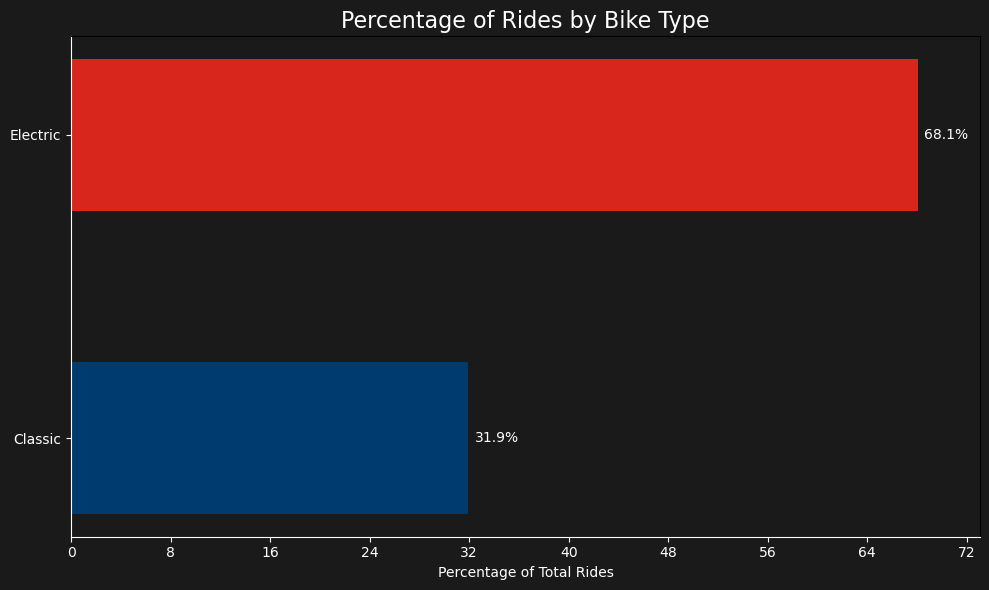

In [370]:
fig, ax = plt.subplots(figsize=(10, 6))

bars = ax.barh(
    bike_counts.index[::-1],
    bike_counts.values[::-1],
    color=colors[:len(bike_counts)],
    height=0.5
)

fig.patch.set_facecolor('#1a1a1a')
ax.set_facecolor('#1a1a1a')

ax.set_title('Percentage of Rides by Bike Type', fontsize=16, color='white')
ax.set_xlabel('Percentage of Total Rides', color='white')
ax.set_xlim(0, bike_counts.max() + 5)
ax.tick_params(colors='white')
ax.spines['bottom'].set_color('white')
ax.spines['left'].set_color('white')
ax.xaxis.set_major_locator(MaxNLocator(integer=True))

for i, value in enumerate(bike_counts.values[::-1]):
    ax.text(value + 0.5, i, f"{value:.1f}%", va='center', fontsize=10, color='white')

plt.tight_layout()
plt.savefig('Question3Bar.jpg', format='jpg', dpi=300)

#### Creating Pie Chart

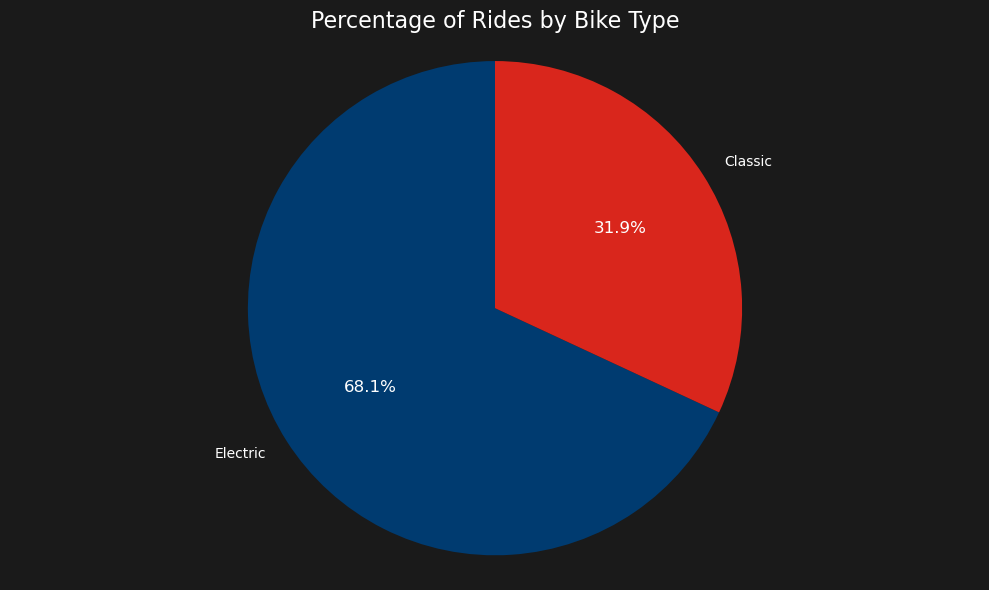

In [373]:
fig, ax = plt.subplots(figsize=(10, 6))

wedges, texts, autotexts = ax.pie(
    bike_counts,
    labels=bike_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors[:len(bike_counts)],
    textprops={'fontsize': 10, 'color': 'white'}  
)

ax.set_title('Percentage of Rides by Bike Type', fontsize=16, color='white')
ax.axis('equal')  
fig.patch.set_facecolor('#1a1a1a')  
ax.set_facecolor('#1a1a1a')

for autotext in autotexts:
    autotext.set_color('white')  
    autotext.set_fontsize(12)

plt.tight_layout()
plt.savefig('Question3Pie.jpg', format='jpg', dpi=300)

***
## Question #4: What days of the week and times of day have the highest ride volume and duration?

***

#### Convert 'StartTime' column to datetime data type

In [383]:
df['StartTime'].dtype

dtype('<M8[ns]')

In [385]:
df['StartTime'] = pd.to_datetime(df['StartTime'])
df['StartTime'].dtype

dtype('<M8[ns]')

#### Create columns for day of the week and hour of the day

In [388]:
df['DayOfWeek'] = df['StartTime'].dt.day_name()
df['HourOfDay'] = df['StartTime'].dt.hour
df.head(2)

,RideID,BikeType,StartTime,EndTime,StartStation,StartStationID,EndStation,EndStationID,StartLat,StartLng,EndLat,EndLng,UserType,RideDurationMin,DayOfWeek,HourOfDay
0,B4544C93905FA10E,electric_bike,2024-10-13 17:38:36.748,2024-10-13 17:45:22.657,Rutgers St & Henry St,5230.02,Lafayette St & Grand St,5422.09,40.713322,-73.990097,40.720280,-73.998790,member,6.765150,Sunday,17
1,435860FFE89FC278,electric_bike,2024-10-06 00:58:33.042,2024-10-06 01:02:46.775,Washington Ave & E 167 St,8068.01,College Ave & E 170 St,8175.06,40.829896,-73.907618,40.837576,-73.910489,member,4.228883,Sunday,0


#### Formatting & Sorting for consistent display

In [391]:
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df['DayOfWeek'] = pd.Categorical(df['DayOfWeek'], categories=day_order, ordered=True)
df.head(2)

,RideID,BikeType,StartTime,EndTime,StartStation,StartStationID,EndStation,EndStationID,StartLat,StartLng,EndLat,EndLng,UserType,RideDurationMin,DayOfWeek,HourOfDay
0,B4544C93905FA10E,electric_bike,2024-10-13 17:38:36.748,2024-10-13 17:45:22.657,Rutgers St & Henry St,5230.02,Lafayette St & Grand St,5422.09,40.713322,-73.990097,40.720280,-73.998790,member,6.765150,Sunday,17
1,435860FFE89FC278,electric_bike,2024-10-06 00:58:33.042,2024-10-06 01:02:46.775,Washington Ave & E 167 St,8068.01,College Ave & E 170 St,8175.06,40.829896,-73.907618,40.837576,-73.910489,member,4.228883,Sunday,0


#### Using value counts to get average ride volume for each day of the week 

In [394]:
ride_counts = df['DayOfWeek'].value_counts().reindex(day_order)
ride_counts

DayOfWeek
Monday       109648
Tuesday      137479
Wednesday    138185
Thursday     130450
Friday       133185
Saturday     140591
Sunday       124813
Name: count, dtype: int64

#### Using groupby and mean functions to get average duration for each hour of the day

In [397]:
hourly_duration = df.groupby('HourOfDay')['RideDurationMin'].mean()
hourly_duration

HourOfDay
0     13.551569
1     13.745872
2     13.739833
3     13.996845
4     13.195110
5     11.102334
6     10.831820
7     11.228835
8     11.826522
9     12.394936
10    13.781557
11    14.697313
12    14.920689
13    15.182760
14    15.513392
15    15.352587
16    14.890463
17    14.302551
18    13.628545
19    13.023461
20    12.894393
21    13.396003
22    13.349162
23    13.724348
Name: RideDurationMin, dtype: float64

#### Creating plot for days of the week with highest ride volume

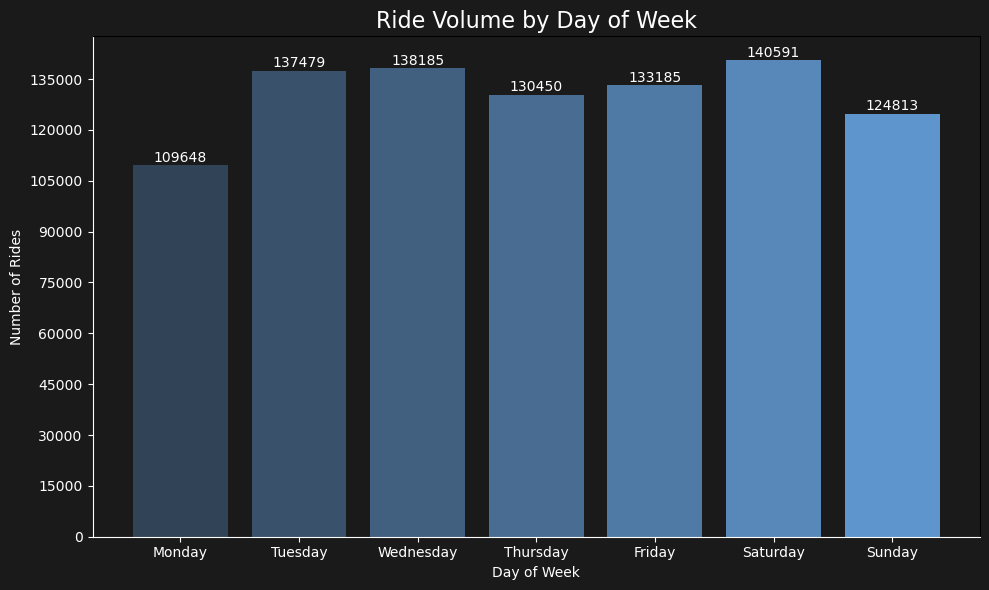

In [400]:
base_blue = "#68A4E3"
colors = [mcolors.to_rgba(base_blue, alpha=0.3 + 0.7*i/len(day_order)) for i in range(len(day_order))]
ride_counts = df['DayOfWeek'].value_counts().reindex(day_order)

fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(ride_counts.index, ride_counts.values, color=colors)

fig.patch.set_facecolor('#1a1a1a') 
ax.set_facecolor('#1a1a1a')
ax.set_title('Ride Volume by Day of Week', fontsize=16, color='white')
ax.set_ylabel('Number of Rides', color='white')
ax.set_xlabel('Day of Week', color='white')
ax.tick_params(colors='white')
ax.spines['bottom'].set_color('white')
ax.spines['left'].set_color('white')
ax.yaxis.set_major_locator(MaxNLocator(integer=True))

for i, value in enumerate(ride_counts.values):
    ax.text(i, value + 1000, str(value), ha='center', fontsize=10, color='white')

plt.tight_layout()
plt.savefig('Question4A.jpg', format='jpg', dpi=300)

#### Creating plot for times of day with the longest ride durations 

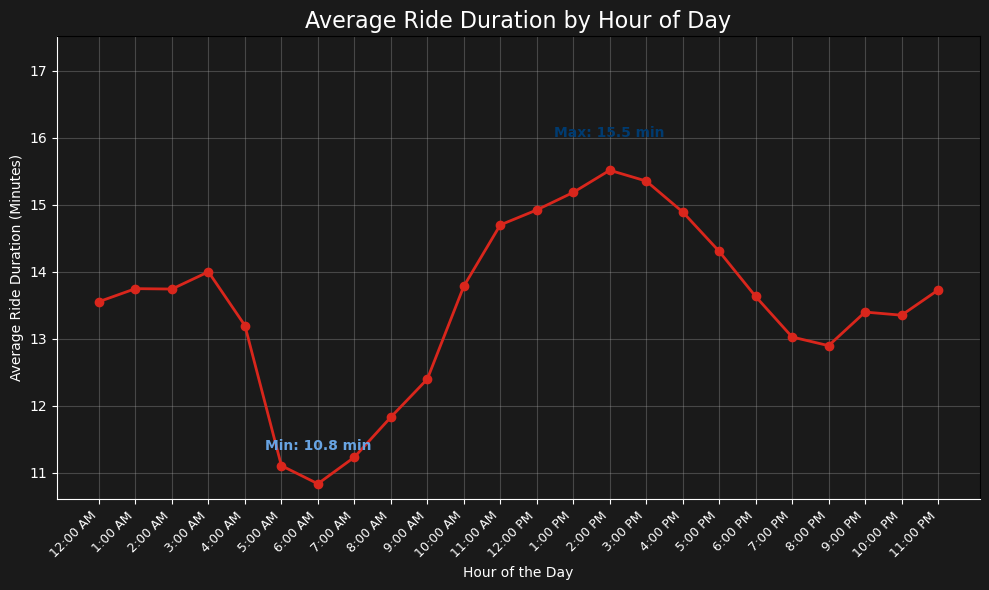

In [403]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(hourly_duration.index, hourly_duration.values, marker='o', color='#d9261c', linewidth=2)

ax.set_title('Average Ride Duration by Hour of Day', fontsize=16, color='white')
ax.set_xlabel('Hour of the Day', color='white')
ax.set_ylabel('Average Ride Duration (Minutes)', color='white')
ax.set_xticks(range(0, 24))
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.grid(True, linestyle='-', alpha=0.3)

ax.tick_params(colors='white')
ax.spines['bottom'].set_color('white')
ax.spines['left'].set_color('white')

max_hour = hourly_duration.idxmax()
max_val = hourly_duration.max()
ax.text(max_hour, max_val + 0.5, f"Max: {max_val:.1f} min",
        ha='center', fontsize=10, fontweight='bold', color='#003b70')  

min_hour = hourly_duration.idxmin()
min_val = hourly_duration.min()
ax.text(min_hour, min_val + 0.5, f"Min: {min_val:.1f} min",
        ha='center', fontsize=10, fontweight='bold', color='#68A4E3')
ax.set_ylim(top=max_val + 2)

hour_labels = [
    '12:00 AM', '1:00 AM', '2:00 AM', '3:00 AM', '4:00 AM', '5:00 AM',
    '6:00 AM', '7:00 AM', '8:00 AM', '9:00 AM', '10:00 AM', '11:00 AM',
    '12:00 PM', '1:00 PM', '2:00 PM', '3:00 PM', '4:00 PM', '5:00 PM',
    '6:00 PM', '7:00 PM', '8:00 PM', '9:00 PM', '10:00 PM', '11:00 PM'
]
ax.set_xticks(range(24))
ax.set_xticklabels(hour_labels, rotation=45, ha='right', fontsize=9)

fig.patch.set_facecolor('#1a1a1a')  
ax.set_facecolor('#1a1a1a')         

plt.tight_layout()
plt.savefig('Question4B.jpg', format='jpg', dpi=300)

***